In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)
import seaborn as sns # per visualizzare grafico correlazioni
import statistics as sts # statistic module for variance

In [2]:
# mettiamo il dataframe dentro la variabile df
df = pd.read_csv('Df_pattern_mining.csv', sep=',')

In [3]:
from fim import apriori

In [4]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [5]:
baskets = df.values.tolist()

In [6]:
supp_gridsearch = [70,80,90]
zmin_gridsearch = [2,3,4,5]
conf_gridsearch = [70,80,90]
results_rules = list()

In [7]:
def report_regole(lista):
    for item in lista:
        print()
        print("Target:" + str(item[0]))
        print("Support:" + str(item[1]))
        print("Zmin:" + str(item[2]))
        print("Confidence" + str(item[3]))
        print()

In [8]:
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='Cl')
            for r in rules:
                if r[3] > 1.05 or r[3] < 0.95:
                    results_rules.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [9]:
len(results_rules)

95

In [10]:
for r in results_rules:
    if r[3]==90:
        print(r)

(('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAC', 'yes_TrainTimesLY'), 98.74651810584957, 1.1239350881036587), 70, 2, 90)
(('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAC'), 98.7788331071913, 1.1243028981751102), 70, 2, 90)
(('low_Stag', ('0-3 years_YWCM', 'yes_TrainTimesLY'), 98.62448418156808, 1.1225460952351514), 70, 2, 90)
(('low_Stag', ('0-3 years_YWCM',), 98.65951742627345, 1.1229448444136518), 70, 2, 90)
(('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAC', 'yes_TrainTimesLY'), 98.74651810584957, 1.1239350881036587), 70, 3, 90)
(('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAC'), 98.7788331071913, 1.1243028981751102), 70, 3, 90)
(('low_Stag', ('0-3 years_YWCM', 'yes_TrainTimesLY'), 98.62448418156808, 1.1225460952351514), 70, 3, 90)
(('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAC', 'yes_TrainTimesLY'), 98.74651810584957, 1.1239350881036587), 70, 4, 90)


In [10]:
report_regole(results_rules)


Target:('No_OT', ('No_Attr', 'low_Stag', 'less 10 years_YAC'), 76.67597765363129, 1.078788407821229)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr', 'low_Stag', 'yes_TrainTimesLY'), 76.19718309859155, 1.072052034428795)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr', 'low_Stag'), 76.3013698630137, 1.073517884322679)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr', 'less 10 years_YAC', 'yes_TrainTimesLY'), 76.90355329949239, 1.0819902707275804)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr', 'less 10 years_YAC'), 76.78132678132678, 1.0802706115206115)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr', 'yes_TrainTimesLY'), 76.49938800489596, 1.0763038895688835)
Support:70
Zmin:2
Confidence70


Target:('No_Attr', ('No_OT',), 89.44444444444444, 1.0748187689468829)
Support:70
Zmin:2
Confidence70


Target:('No_OT', ('No_Attr',), 76.3938315539739, 1.0748187689468829)
Support:70
Zmin:2
Confidence70


Target:('0-3 years_YWCM', (

In [31]:
a = [x for x in range(91)]


In [11]:
supp_gridsearch = [70]
zmin_gridsearch = [2,3]
conf_gridsearch = [x for x in range(10,91)]
results_rules2 = list()

for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='Cl')
            for r in rules:
                if r[3] > 1.05 or r[3] < 0.95:
                    results_rules2.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [12]:
l_supp = list()
l_zmin = list()
l_conf = list()
# d = dict()
for i in results_rules2:
    l_supp.append(i[1])
    l_zmin.append(i[2])
    l_conf.append(i[3])

In [13]:
set(l_supp)

{70}

In [14]:
len(results_rules2)

11807

## confidence

Text(0.5, 0, 'Confidence')

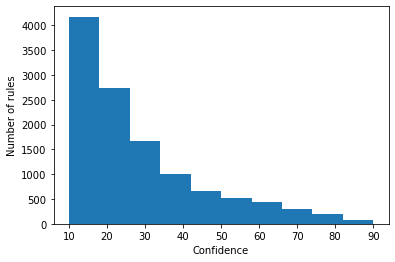

In [39]:
plt.hist(l_conf)
plt.ylabel("Number of rules")
plt.xlabel("Confidence")

In [24]:
results_rules2

[(('Healthcare Representative',
   ('low_Inc', 'less 10 years_YAC', 'yes_TrainTimesLY'),
   10.0,
   1.077659574468085),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('low_Inc', 'yes_TrainTimesLY'),
   10.256410256410255,
   1.105291871249318),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('No_Attr', 'low_Stag', 'less 10 years_YAC'),
   10.335195530726256,
   1.1137822417686913),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('No_Attr', 'low_Stag', 'yes_TrainTimesLY'),
   10.84507042253521,
   1.1687293976625712),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('No_Attr', 'low_Stag'),
   10.547945205479452,
   1.1367094141649665),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('No_Attr', 'less 10 years_YAC', 'yes_TrainTimesLY'),
   10.786802030456853,
   1.162450048601361),
  70,
  2,
  10),
 (('Healthcare Representative',
   ('No_Attr', 'less 10 years_YAC'),
   10.442260442260443,
   1.1253201944691307),
  70,
  2,
  10),
 (('Healthcare Representati

## Lift

In [15]:
l_lift = list()
for i in range(len(results_rules2)):
    l_lift.append(results_rules2[i][0][3])


Text(0, 0.5, 'Number of rules')

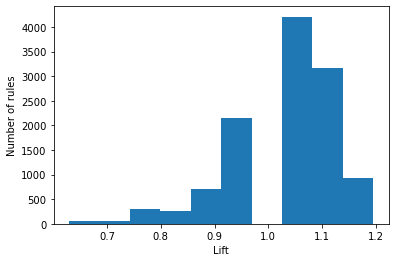

In [38]:

plt.hist(l_lift)
plt.xlabel("Lift")
plt.ylabel("Number of rules")

In [32]:
j=0
z=0
for i in l_lift:
    if i > 1.0:
        j+=1
    elif i< 1.0:
        z+=1

print ("positivi ", j," negativi ", z)

positivi  8293  negativi  3514


## confidence

In [16]:
l_cont_supp = list([0,0,0,0,0,0,0,0])
for r in l_conf:
    if r == 10:
        l_cont_supp[0]+=1
    if r == 20:
        l_cont_supp[1]+=1
    if r == 30:
        l_cont_supp[2]+=1
    if r == 40:
        l_cont_supp[3]+=1
    if r == 50:
        l_cont_supp[4]+=1
    if r == 60:
        l_cont_supp[5]+=1
    if r==70:
        l_cont_supp[6]+= 1
    if r==80:
        l_cont_supp[7]+= 1

In [18]:
l_cont_supp

[634, 399, 205, 107, 71, 61, 34, 21]

In [19]:
l_conf2 = list([10,20,30,40,50,60,70,80])


In [20]:
# how changes the number of rules w.r.t. the min_sup parameter
plt.bar(l_supp2, l_cont_supp, log = True)
xlabel('Confidence')
plt.show()

NameError: name 'l_supp2' is not defined

In [ ]:
x = lift
y = 